<a href="https://colab.research.google.com/github/raihanewubd/CSE457/blob/main/CSE_475_lab_5_yolov11_object_detection_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="xai3waM8J9zJBNreNjSx")
project = rf.workspace("ewuricedataset").project("rice-panicle-final")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rice-Panicle-Final-1 in yolov11:: 100%|██████████| 4398/4398 [00:01<00:00, 4174.42it/s]


ultralytics – the official Python package for YOLO (object detection, segmentation, classification, etc.)
Home
.

supervision – Roboflow’s model-agnostic CV toolkit for unifying inference results into a common API and visualizers
GitHub
.

roboflow – the Python client for managing datasets, training runs, and deployments via the Roboflow platform

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.7/235.7 GB disk)


In [5]:
dataset.location

'/content/Rice-Panicle-Final-1'

In [4]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

1.   `yolo` -Runs the Ultralytics YOLO command-line interface from within the notebook.

2.   `task=detect` -Selects the object detection task (i.e. bounding boxes + class labels).

3.   `mode=train` -Puts the CLI into training mode, so it fits the model to your dataset rather than running inference or validation.

4.   `model=yolo11s.pt` -Specifies the starting weights file—here the YOLO v11 “small” model—so you fine-tune from pretrained parameters rather than training from scratch.
5.   `data=/content/Rice-Panicle-Final-1/data.yaml` -Points to the dataset configuration YAML, which defines:
*   paths to your train/val image folders
*   the number of classes (nc)
*   the class names list (names)

6.   `epochs=10` -Trains for 10 complete passes over the dataset. More epochs can improve accuracy but lengthen training time.

7.   `imgsz=640` -Resizes (or pads) all input images to 640 × 640 pixels before feeding them into the model—balancing detail and speed.

7.   `plots=True` -Enables saving of training/validation plots (loss curves, mAP graphs, etc.) to your working directory so you can visually monitor performance

In [6]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/Rice-Panicle-Final-1/data.yaml epochs=10 imgsz=640 plots=True


100% 18.4M/18.4M [00:00<00:00, 219MB/s]
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Rice-Panicle-Final-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

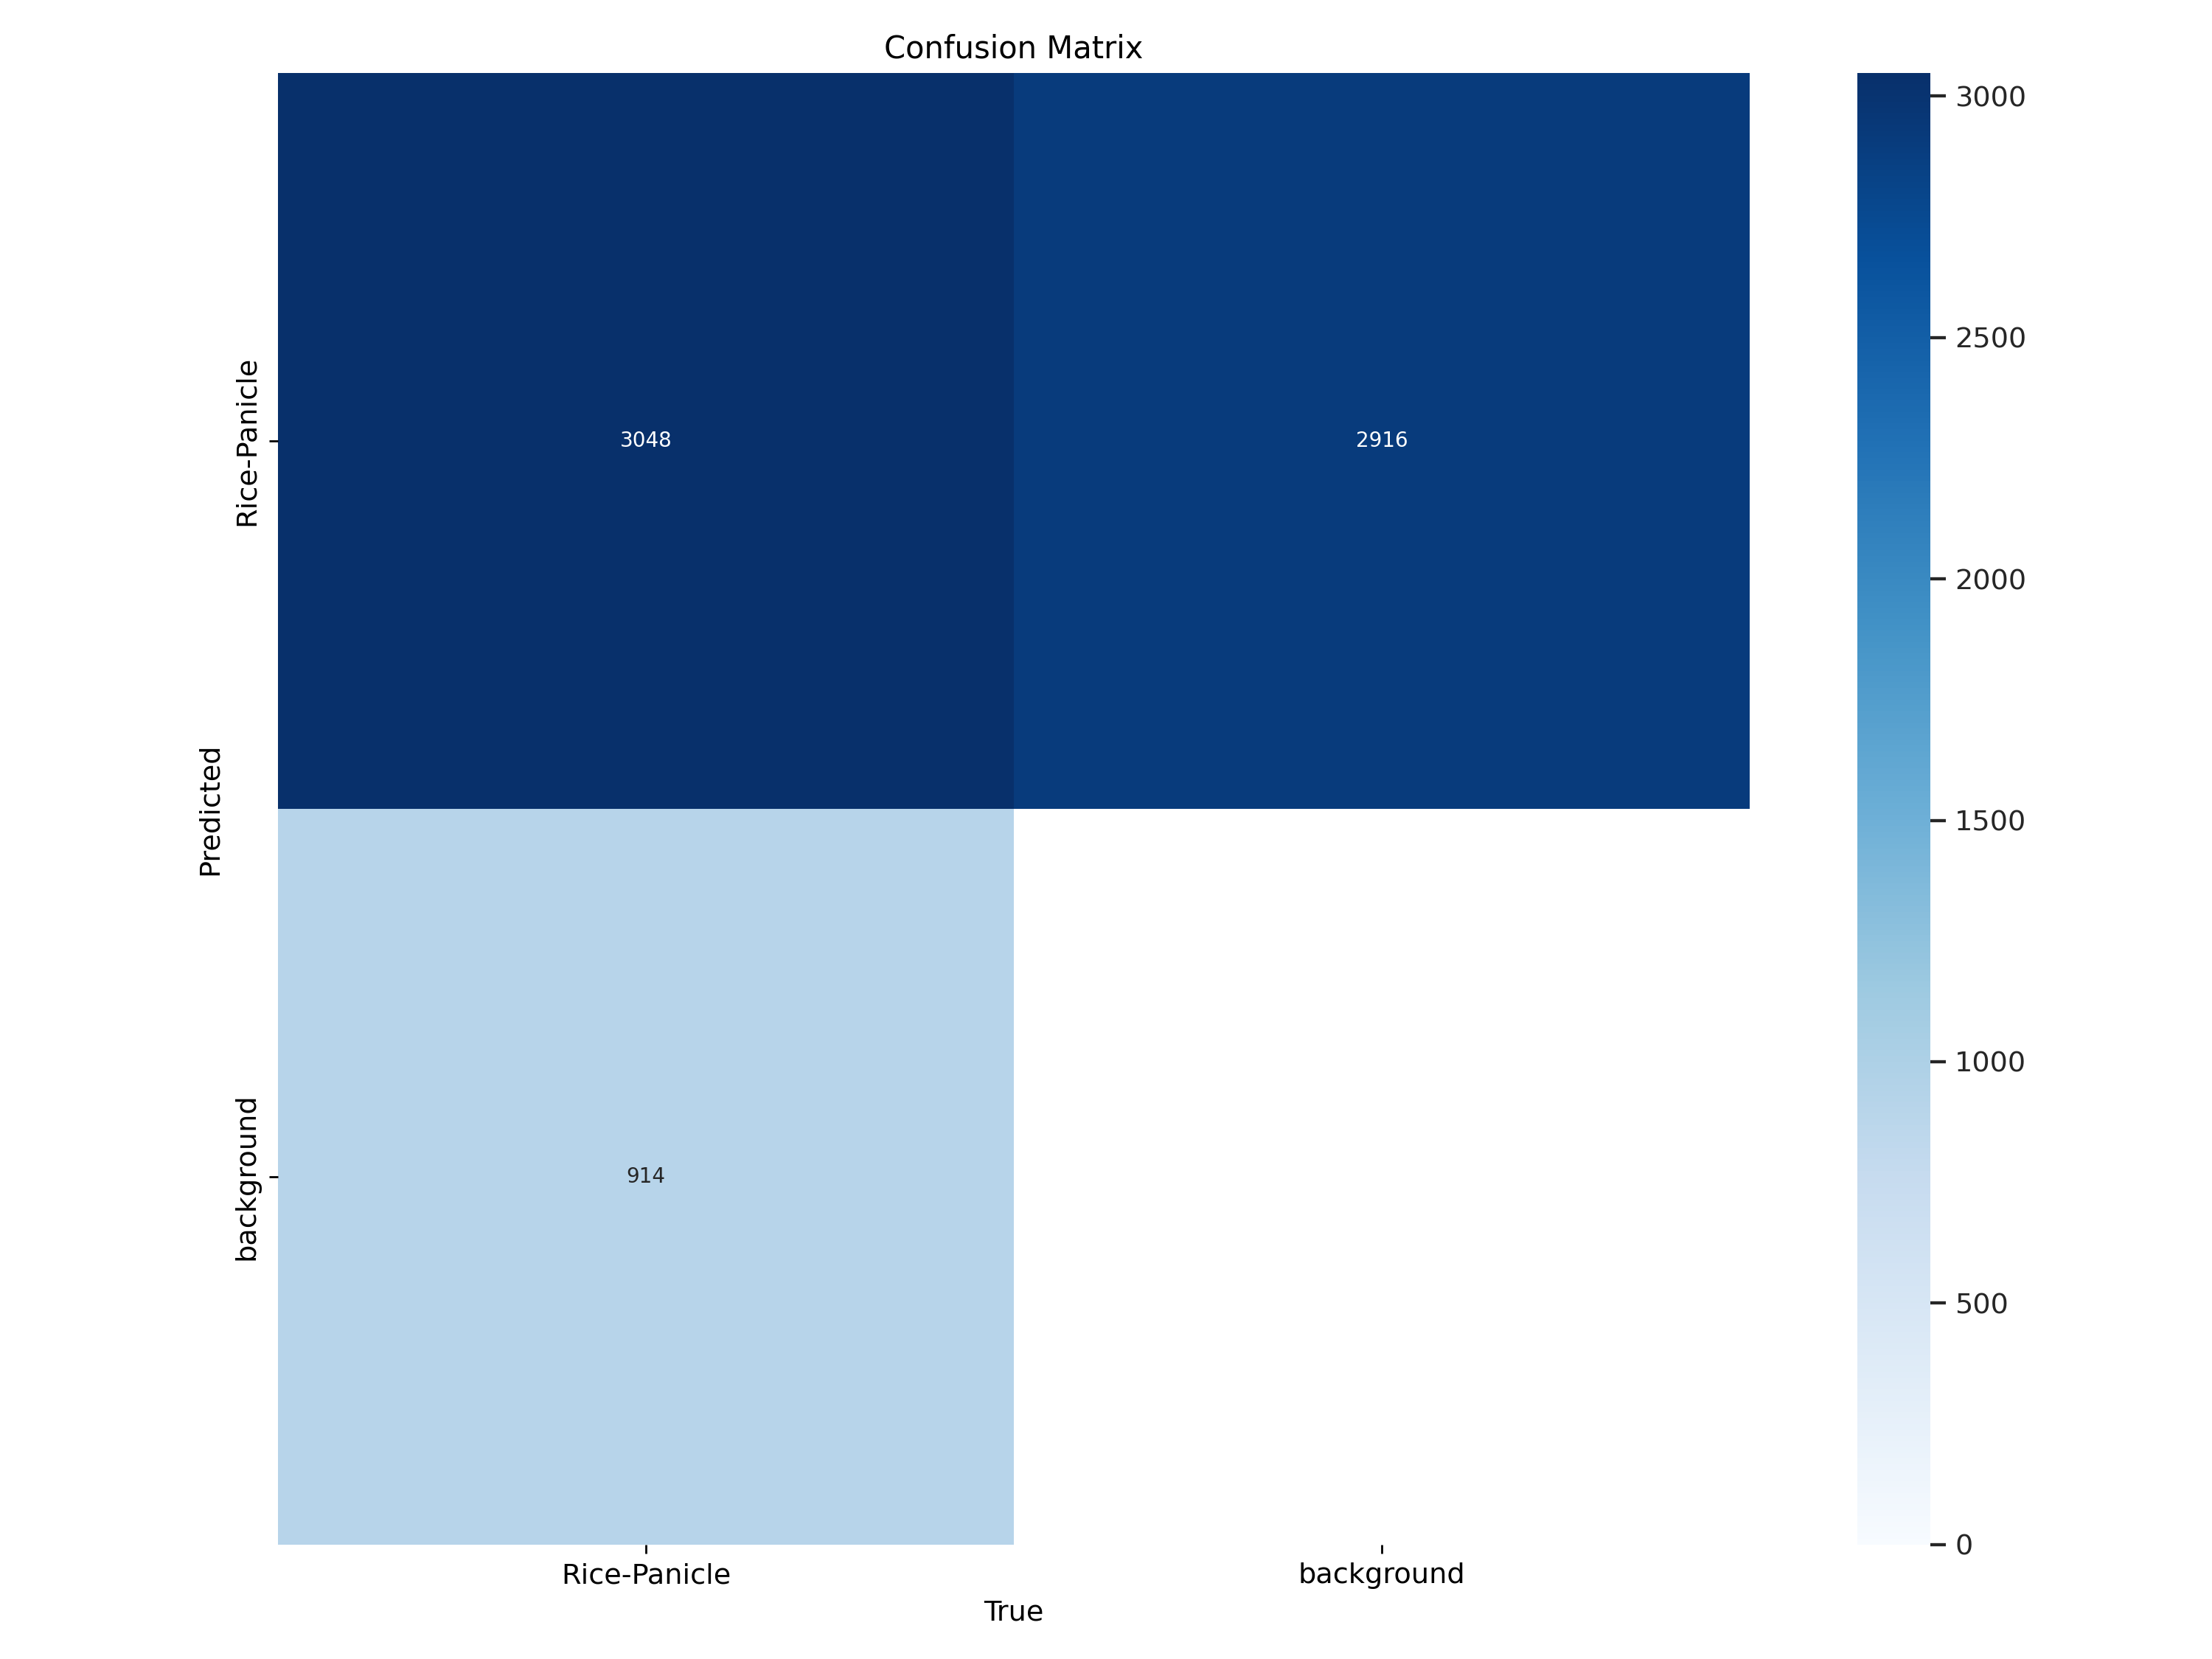

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Rice-Panicle-Final-1/test/images save=True

In [9]:
!yolo task=detect mode=predict \
     model=/content/runs/detect/train/weights/best.pt \
     conf=0.25 \
     source=/content/Rice-Panicle-Final-1/test/images \
     save=True

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/220 /content/Rice-Panicle-Final-1/test/images/004_split_3_0_jpg.rf.7aa9d207ca573dd43cbc13bd4568d393.jpg: 384x640 20 Rice-Panicles, 76.8ms
image 2/220 /content/Rice-Panicle-Final-1/test/images/006_split_0_2_jpg.rf.dd9d1202dfedec07caa174adbf46a22f.jpg: 384x640 28 Rice-Panicles, 10.3ms
image 3/220 /content/Rice-Panicle-Final-1/test/images/008_split_0_1_jpg.rf.58bce36d487d2d5ab729c49317706842.jpg: 384x640 40 Rice-Panicles, 9.8ms
image 4/220 /content/Rice-Panicle-Final-1/test/images/011_split_2_1_jpg.rf.5b56a9eb6de8486c24b4c0dc27828638.jpg: 384x640 22 Rice-Panicles, 9.6ms
image 5/220 /content/Rice-Panicle-Final-1/test/images/012_split_2_1_jpg.rf.caf30ab20f9d70b2631230ca9137062b.jpg: 384x640 34 Rice-Panicles, 9.5ms
image 6/220 /content/Rice-Panicle-Final-1/test/images/013_split_1_3_jpg.rf.6bbf79a7e0265529c83baa7c6812c

1.   `!yolo` -The leading ! tells Jupyter to run the following as a shell command. yolo invokes the Ultralytics CLI that you installed with pip install ultralytics

2.   `task=detect` -Chooses the object-detection workflow (bounding boxes + labels).

3.   `mode=predict` -Puts the CLI into inference (“predict”) mode, so it loads a trained model and runs it on new data rather than training or validating.

4.   `model=/content/runs/detect/train2/weights/best.pt` -Points to the checkpoint file you want to use for inference—here, the best.pt weights saved during your previous train run.

5.   `conf=0.25` -Sets the confidence threshold to 0.25. Predictions with a confidence score below this value are discarded.

6.   `source=/content/Rice-Panicle-Final-1/test/images` -Specifies the input source. This can be a single image, a folder of images, a video file, a webcam index, or even a URL. Here it’s the directory of test images.

7.   `save=True` -Instructs the CLI to save the annotated output (images with drawn boxes & labels). By default, predictions are displayed but not written to disk; save=True writes them under runs/detect/predict*.



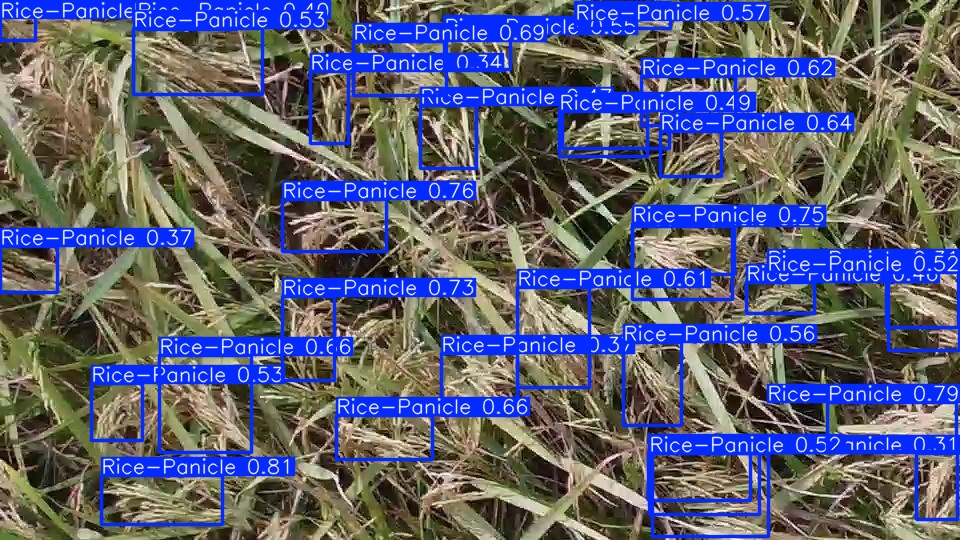

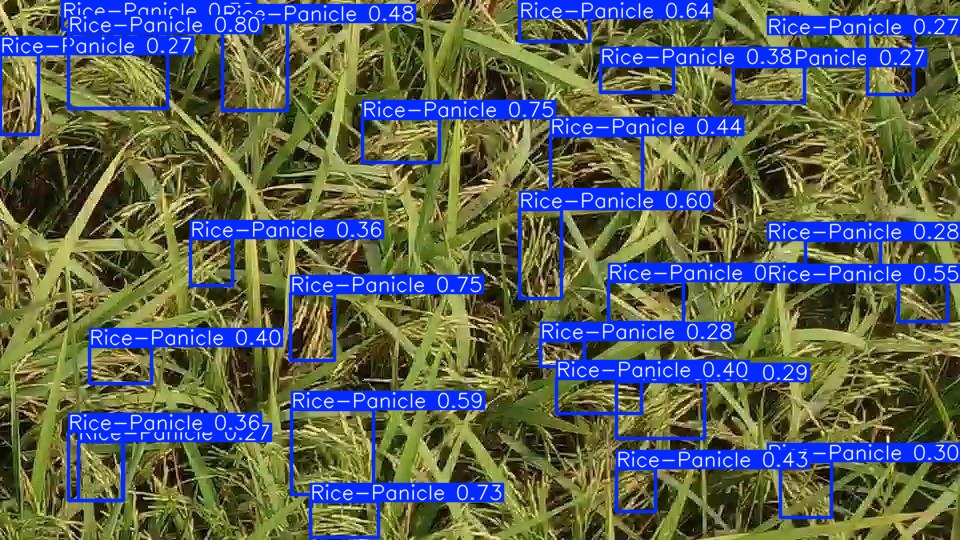

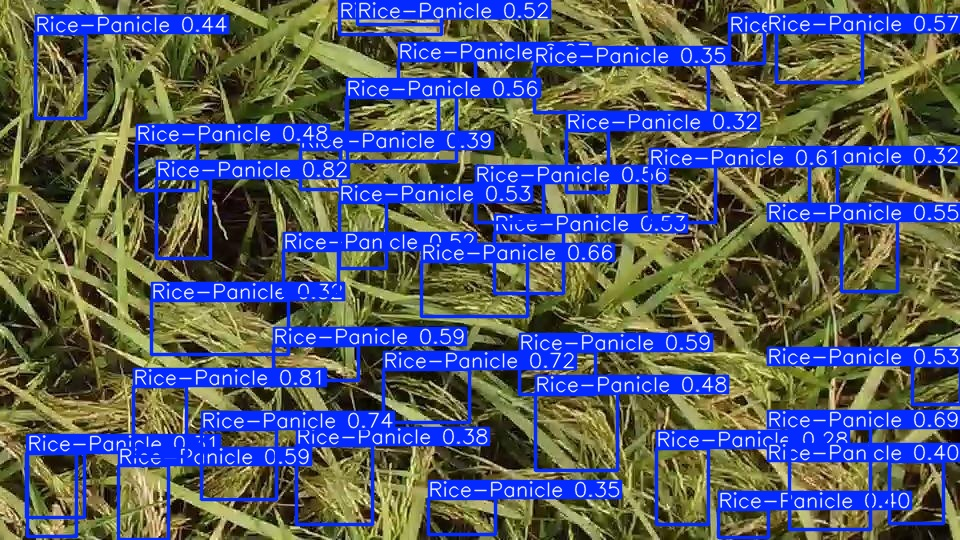

In [10]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [11]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 118 (delta 14), reused 8 (delta 8), pack-reused 96 (from 2)
Receiving objects: 100% (118/118), 41.00 MiB | 23.82 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [12]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [ ]:
!ls

In [13]:
%cd /content/YOLO-V8-CAM

/content/YOLO-V8-CAM


In [ ]:
!ls

In [14]:
!pip install ttach

In [15]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [29]:
img = cv2.imread('/content/Rice-Panicle-Final-1/test/images/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

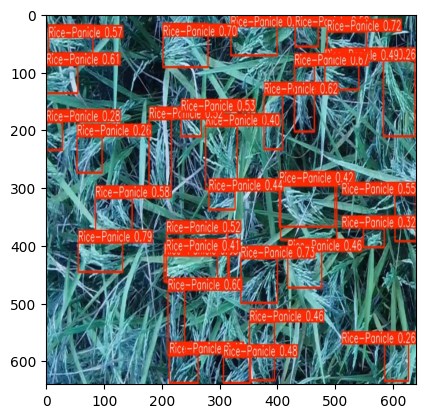

In [33]:
imgDetected = cv2.imread('/content/runs/detect/predict/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg')
imgDetected = cv2.resize(imgDetected, (640, 640))
plt.imshow(imgDetected)
plt.show()

In [17]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/content/yolo11n.pt')
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [18]:
target_layers =[model.model.model[-2]]

In [19]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 (no detections), 198.0ms
Speed: 5.1ms preprocess, 198.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


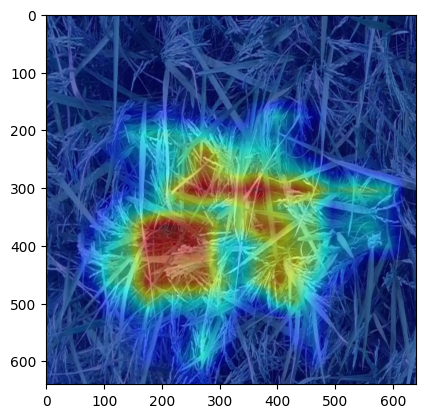

In [20]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 (no detections), 165.2ms
Speed: 2.9ms preprocess, 165.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


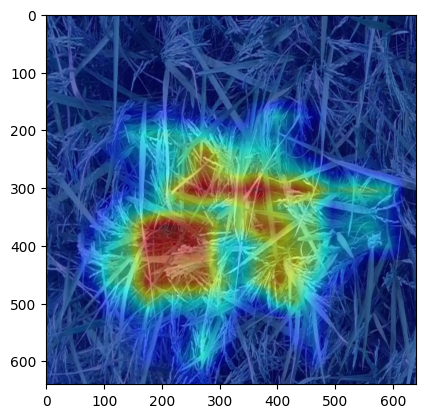

In [21]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [22]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 (no detections), 163.2ms
Speed: 2.7ms preprocess, 163.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


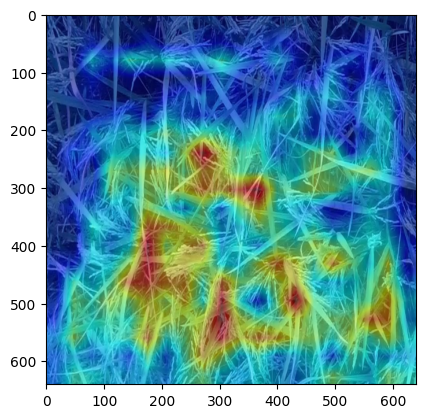

In [23]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

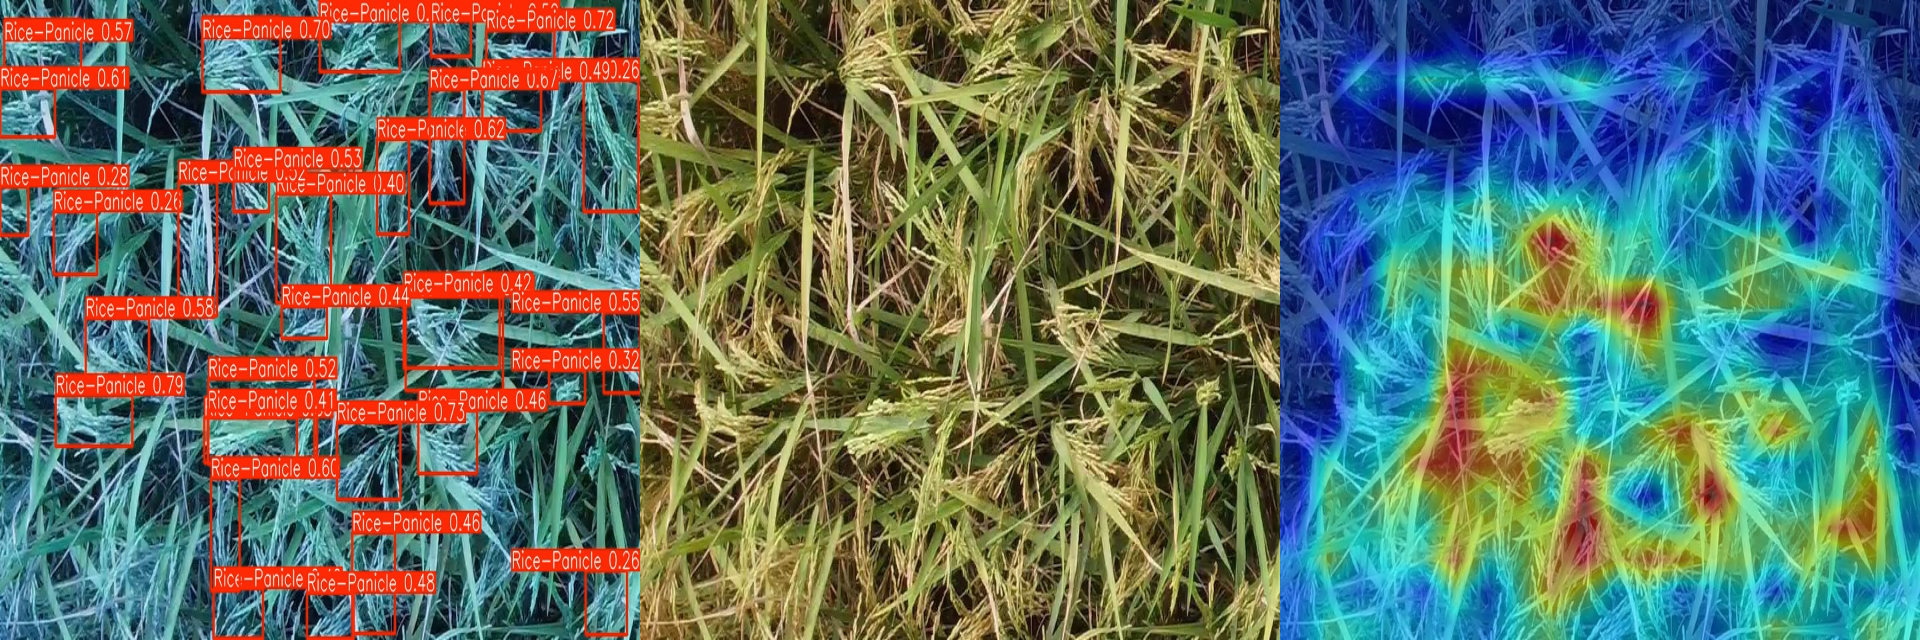

In [34]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, imgDetected,cam_image)))

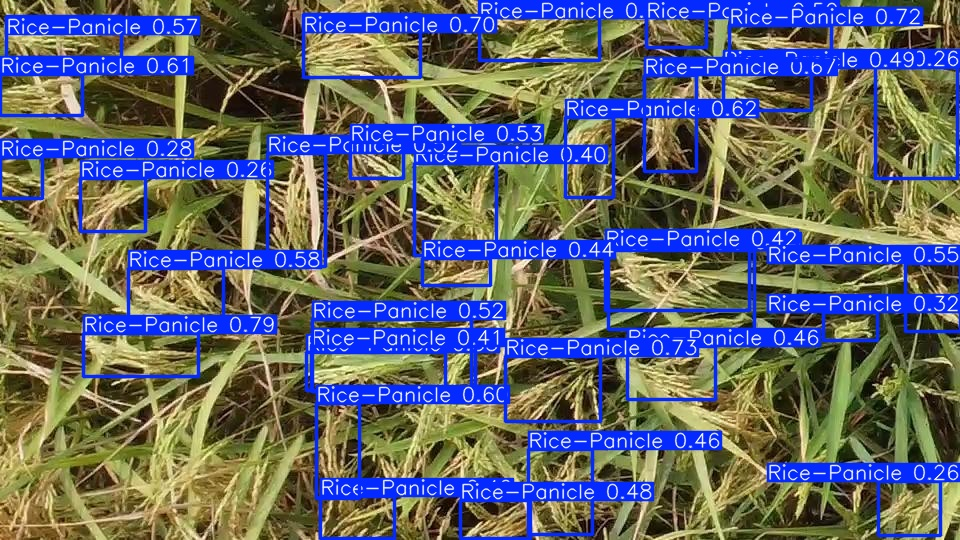

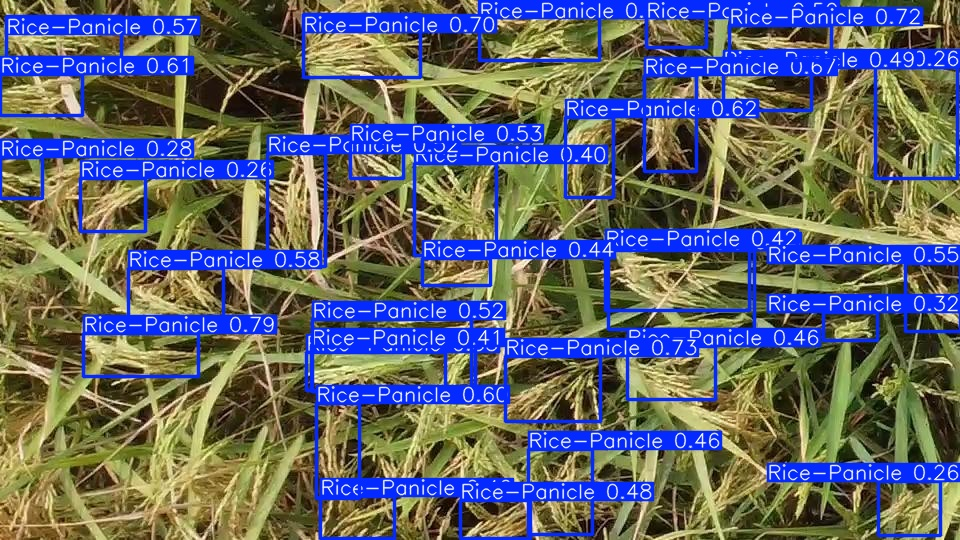

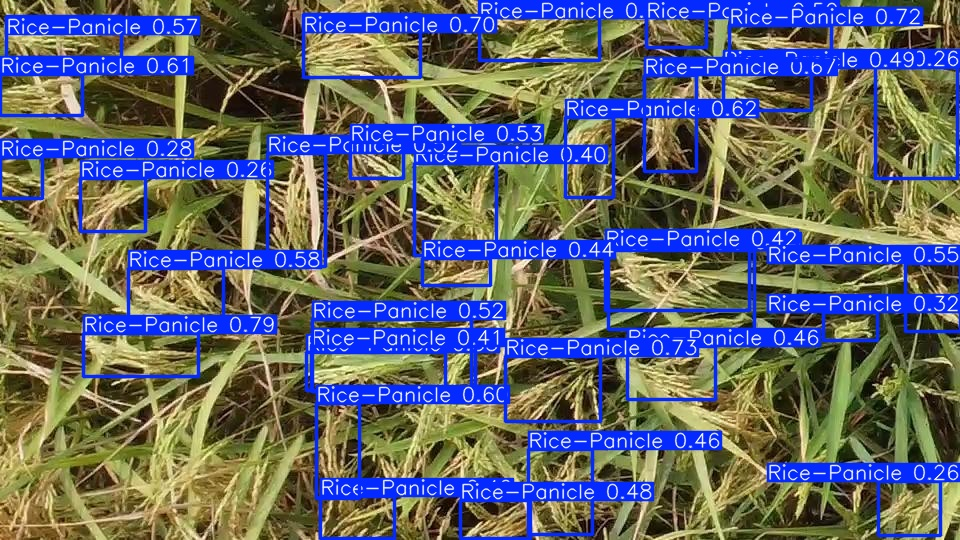

In [27]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename='/content/runs/detect/predict/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg', width=600))
	print("\n")